<h1>Options Analysis and Stock Trader Model</h1>
<p>An analysis of traditional <strong>stock options</strong> to see the relations and create a model that can predict their performance.</p>

<h4>1. Getting Data</h4>

In [1]:
import yfinance as yf

In [2]:
import pandas as pd

data = pd.read_csv("nasdaq_screener_1722940907577.csv")
stock_tickers = list(data['Symbol'])
stock_tickers


['A',
 'AA',
 'AACG',
 'AACI',
 'AACIU',
 'AACIW',
 'AACT',
 'AADI',
 'AAGR',
 'AAGRW',
 'AAL',
 'AAMC',
 'AAME',
 'AAN',
 'AAOI',
 'AAON',
 'AAP',
 'AAPL',
 'AAT',
 'AB',
 'ABAT',
 'ABBV',
 'ABCB',
 'ABCL',
 'ABEO',
 'ABEV',
 'ABG',
 'ABIO',
 'ABL',
 'ABLLL',
 'ABLLW',
 'ABLV',
 'ABLVW',
 'ABM',
 'ABNB',
 'ABOS',
 'ABR',
 'ABR^D',
 'ABR^E',
 'ABR^F',
 'ABSI',
 'ABT',
 'ABTS',
 'ABUS',
 'ABVC',
 'ABVE',
 'ABVEW',
 'ABVX',
 'AC',
 'ACA',
 'ACAB',
 'ACABW',
 'ACAC',
 'ACACW',
 'ACAD',
 'ACB',
 'ACCD',
 'ACCO',
 'ACDC',
 'ACEL',
 'ACET',
 'ACGL',
 'ACGLN',
 'ACGLO',
 'ACHC',
 'ACHL',
 'ACHR',
 'ACHV',
 'ACI',
 'ACIC',
 'ACIU',
 'ACIW',
 'ACLS',
 'ACLX',
 'ACM',
 'ACMR',
 'ACN',
 'ACNB',
 'ACNT',
 'ACON',
 'ACONW',
 'ACP',
 'ACP^A',
 'ACR',
 'ACR^C',
 'ACR^D',
 'ACRE',
 'ACRS',
 'ACRV',
 'ACST',
 'ACT',
 'ACTG',
 'ACU',
 'ACV',
 'ACVA',
 'ACXP',
 'ADAG',
 'ADAP',
 'ADBE',
 'ADC',
 'ADC^A',
 'ADCT',
 'ADD',
 'ADEA',
 'ADGM',
 'ADI',
 'ADIL',
 'ADM',
 'ADMA',
 'ADN',
 'ADNT',
 'ADNWW',
 'ADP

In [4]:
# Function to get historical data for stock tickers using yfinance
def get_stock_data(tickers, start_date='1900-01-01'):
    stock_data = {}
    for ticker in tickers:
        try:
            data = yf.download(ticker, start=start_date)
            stock_data[ticker] = data
        except Exception as e:
            print(f"Error fetching data for {ticker}: {e}")
    return stock_data

In [5]:
stock_data = get_stock_data(stock_tickers)

[*********************100%%**********************]  1 of 1 completed


KeyboardInterrupt: 

In [ ]:

for key in stock_data.keys():
    try:
        pd.DataFrame(stock_data[key]).to_csv(f'./historical-data/{key}-data.csv')
    except Exception as e:
        print(e)

Cannot save file into a non-existent directory: 'historical-data\AKO'
Cannot save file into a non-existent directory: 'historical-data\AKO'


KeyboardInterrupt: 

In [1]:
import tensorflow as tf
import numpy as np
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [3]:
import pandas as pd

data = pd.read_csv('historical-data/A-data.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-11-18,32.546494,35.765381,28.612303,31.473534,26.603022,62546380
1,1999-11-19,30.713518,30.758226,28.478184,28.880545,24.411299,15234146
2,1999-11-22,29.551144,31.473534,28.657009,31.473534,26.603022,6577870
3,1999-11-23,30.400572,31.205294,28.612303,28.612303,24.184568,5975611
4,1999-11-24,28.701717,29.998213,28.612303,29.372318,24.826967,4843231
...,...,...,...,...,...,...,...
6211,2024-07-30,138.039993,139.729996,137.110001,139.490005,139.490005,1428000
6212,2024-07-31,140.389999,144.000000,139.710007,141.399994,141.399994,2582700
6213,2024-08-01,142.240005,144.220001,141.750000,142.860001,142.860001,2896500
6214,2024-08-02,141.979996,143.169998,135.759995,139.039993,139.039993,2298400


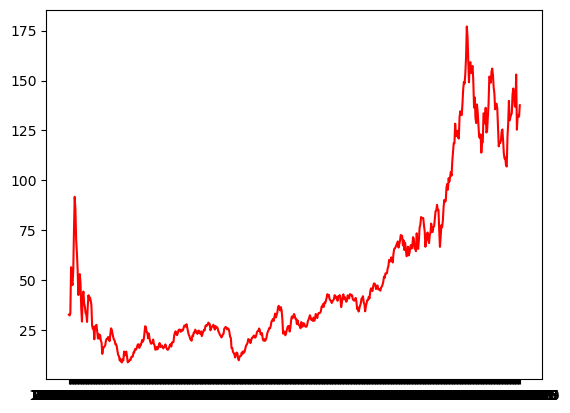

In [4]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(data["Date"][::10], data["Open"][::10], color='r')
plt.show()

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
norm_data = scaler.fit_transform(data[data.columns.drop("Date")])

In [6]:
def create_dataset(data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(data)-look_back-1):
            a = data.iloc[i].values
            dataX.append(a)
            dataY.append(data.iloc[i+look_back].values)
    return np.array(dataX), np.array(dataY)

In [7]:
train_size = int(len(norm_data) * 0.67)
train, test = pd.DataFrame(norm_data[:train_size]), pd.DataFrame(norm_data[train_size:])
train_X, train_y = create_dataset(train)
test_X, test_y = create_dataset(test)

In [8]:
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

In [9]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, 6)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(train_X, train_y, epochs=100, batch_size=1, verbose=2)



Epoch 1/100

4162/4162 - 7s - loss: 0.0017 - 7s/epoch - 2ms/step
Epoch 2/100
4162/4162 - 5s - loss: 0.0013 - 5s/epoch - 1ms/step
Epoch 3/100
4162/4162 - 5s - loss: 0.0013 - 5s/epoch - 1ms/step
Epoch 4/100
4162/4162 - 5s - loss: 0.0013 - 5s/epoch - 1ms/step
Epoch 5/100
4162/4162 - 5s - loss: 0.0013 - 5s/epoch - 1ms/step
Epoch 6/100
4162/4162 - 5s - loss: 0.0013 - 5s/epoch - 1ms/step
Epoch 7/100
4162/4162 - 5s - loss: 0.0013 - 5s/epoch - 1ms/step
Epoch 8/100
4162/4162 - 5s - loss: 0.0013 - 5s/epoch - 1ms/step
Epoch 9/100
4162/4162 - 5s - loss: 0.0013 - 5s/epoch - 1ms/step
Epoch 10/100
4162/4162 - 5s - loss: 0.0013 - 5s/epoch - 1ms/step
Epoch 11/100
4162/4162 - 5s - loss: 0.0013 - 5s/epoch - 1ms/step
Epoch 12/100
4162/4162 - 5s - loss: 0.0013 - 5s/epoch - 1ms/step
Epoch 13/100
4162/4162 - 5s - loss: 0.0013 - 5s/epoch - 1ms/step
Epoch 14/100
4162/4162 - 5s - loss: 0.0013 - 5s/epoch - 1ms/step
Epoch 15/100
4162/4162 - 5s - loss: 0.0013 - 5s/epoch - 1ms/step
Epoch 16/100
4162/4162 - 5s - l

In [10]:
model.save("model-predictor-single-trained.h5")

c:\Users\alish\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
import glob

file_paths = glob.glob('historical-data/*.csv')
loaded_model = keras.models.load_model('model-predictor-single-trained.h5')

for file_path in file_paths[::100]:
    data = pd.read_csv(file_path)

    if len(data.index) == 0:
        continue

    norm_data = scaler.fit_transform(data[data.columns.drop("Date")])

    train_size = int(len(norm_data) * 0.67)
    train, test = pd.DataFrame(norm_data[:train_size]), pd.DataFrame(norm_data[train_size:])

    train_X, train_y = create_dataset(train)
    test_X, test_y = create_dataset(test)
    
    train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
    test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

    model.fit(train_X, train_y, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
4162/4162 - 6s - loss: 0.0017 - 6s/epoch - 1ms/step
Epoch 2/100
4162/4162 - 5s - loss: 0.0013 - 5s/epoch - 1ms/step
Epoch 3/100
4162/4162 - 6s - loss: 0.0013 - 6s/epoch - 1ms/step
Epoch 4/100
4162/4162 - 5s - loss: 0.0013 - 5s/epoch - 1ms/step
Epoch 5/100
4162/4162 - 6s - loss: 0.0013 - 6s/epoch - 1ms/step
Epoch 6/100
4162/4162 - 6s - loss: 0.0013 - 6s/epoch - 1ms/step
Epoch 7/100
4162/4162 - 7s - loss: 0.0013 - 7s/epoch - 2ms/step
Epoch 8/100
4162/4162 - 5s - loss: 0.0013 - 5s/epoch - 1ms/step
Epoch 9/100
4162/4162 - 5s - loss: 0.0013 - 5s/epoch - 1ms/step
Epoch 10/100
4162/4162 - 5s - loss: 0.0013 - 5s/epoch - 1ms/step
Epoch 11/100
4162/4162 - 5s - loss: 0.0013 - 5s/epoch - 1ms/step
Epoch 12/100
4162/4162 - 5s - loss: 0.0013 - 5s/epoch - 1ms/step
Epoch 13/100
4162/4162 - 5s - loss: 0.0013 - 5s/epoch - 1ms/step
Epoch 14/100
4162/4162 - 5s - loss: 0.0013 - 5s/epoch - 1ms/step
Epoch 15/100
4162/4162 - 5s - loss: 0.0013 - 5s/epoch - 1ms/step
Epoch 16/100
4162/4162 - 5s - loss

In [ ]:
model.save('model-predictor-trained-multidatasets.h5')